In [1]:
import pandas as pd
from datetime import timedelta,datetime
import matplotlib.pyplot as plt
import math

In [2]:
df=pd.read_excel('volumes.xlsx')

In [3]:
df.dropna(inplace=True)

In [4]:
df['datagroupname'].value_counts()

u_clinical_docs       6
u_clams_correspon     6
u_clms_iwso_docs      5
u_ccs_compliance      5
u_opt_rx_mem_doc      4
u_mr_ucs_corsp_doc    1
Name: datagroupname, dtype: int64

In [5]:
df

,receiveddate,datagroupname,volume
1,2023-04-20 01:16:36,u_clinical_docs,/data1
3,2023-04-20 01:16:38,u_clinical_docs,/data1
4,2023-04-20 01:16:39,u_clms_iwso_docs,/data6
5,2023-04-20 01:16:40,u_ccs_compliance,/data4
6,2023-04-20 01:14:41,u_clms_iwso_docs,/data6
7,2023-04-21 01:14:42,u_clams_correspon,/data3
8,2023-04-21 01:14:43,u_clams_correspon,/data3
9,2023-04-21 01:14:44,u_opt_rx_mem_doc,/data8
10,2023-04-21 01:14:45,u_ccs_compliance,/data4
11,2023-04-21 01:30:46,u_opt_rx_mem_doc,/data8


In [6]:
datagroup_list=df.datagroupname.value_counts().index

In [7]:
def selectionSort(arr):
    for x in range(len(arr)):
        min_idx = x
 
        for i in range(x+1, len(arr)):
            if arr[i] < arr[min_idx]:
                min_idx = i
 
        arr[x], arr[min_idx] = arr[min_idx], arr[x]
 
    return arr
data_list=[]
for datagroupname in datagroup_list:



    df_specific_datagroup_data=df[df['datagroupname']==datagroupname].copy()
    timestamps=list(df_specific_datagroup_data['receiveddate '])
    dates=[]

    for timestamp in timestamps:
        dates.append(timestamp.date())

    first_date=min(dates)
    end_date=max(dates)

    range_dates=[]
    all_dates=list(pd.date_range(first_date,end_date,freq='d'))
    for time in all_dates:
        range_dates.append(time.date())
    df_specific_datagroup_data['date']=dates

    value_counts_date_index=list(df_specific_datagroup_data['date'].value_counts().index)
    value_counts_date_values=list(df_specific_datagroup_data['date'].value_counts().values)
    selectionSort(value_counts_date_index)


    
    df_dict={}
    j=0
    i=0
    while i<len(range_dates):
        df_dict={}
        index=value_counts_date_index[j]
        value=value_counts_date_values[j]

        if range_dates[i]==index:
            j+=1
        else:
            value=0
        data_list.append({"datagroup":datagroupname,"timestamp":range_dates[i],"files_count":value})   
        i+=1

new_df=pd.DataFrame(data_list)

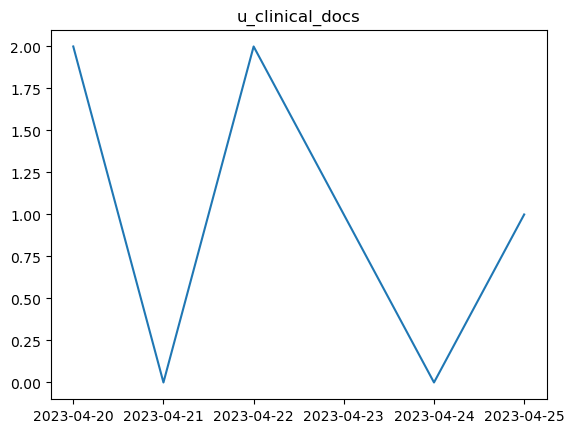

In [8]:
datagroup_name=datagroup_list[0]
specific_data=new_df[new_df['datagroup']==datagroup_name]
plt.title(datagroup_name)
plt.plot(specific_data.timestamp,specific_data.files_count)

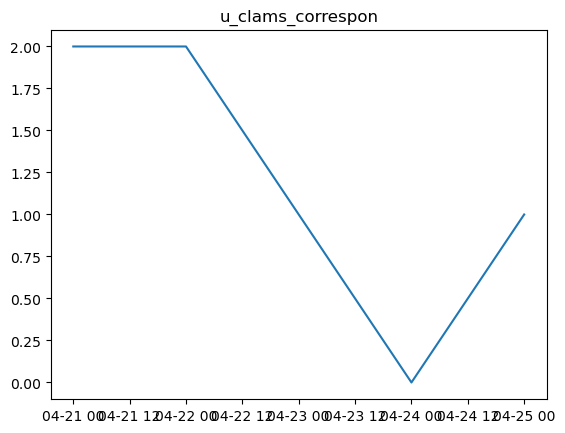

In [9]:
datagroup_name=datagroup_list[1]
specific_data=new_df[new_df['datagroup']==datagroup_name]
plt.title(datagroup_name)
plt.plot(specific_data.timestamp,specific_data.files_count)

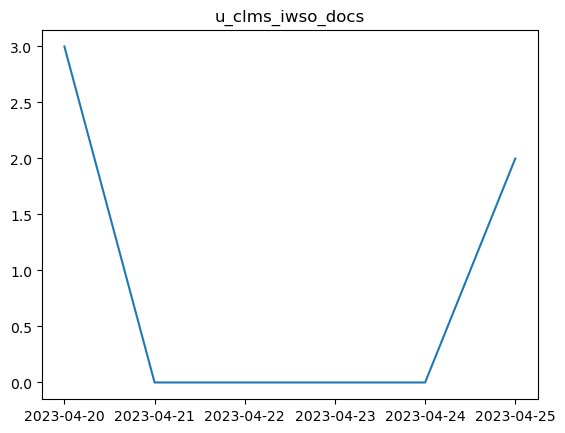

In [10]:
datagroup_name=datagroup_list[2]
specific_data=new_df[new_df['datagroup']==datagroup_name]
plt.title(datagroup_name)
plt.plot(specific_data.timestamp,specific_data.files_count)

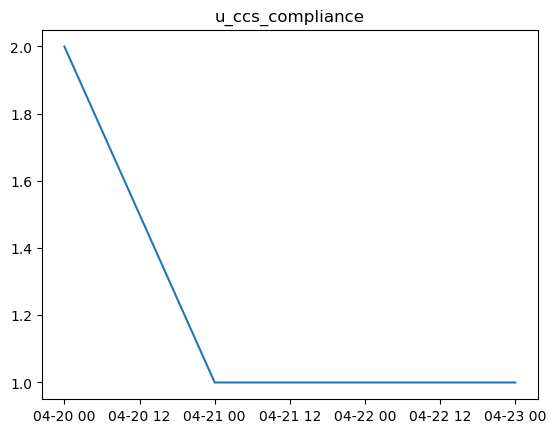

In [11]:
datagroup_name=datagroup_list[3]
specific_data=new_df[new_df['datagroup']==datagroup_name]
plt.title(datagroup_name)
plt.plot(specific_data.timestamp,specific_data.files_count)

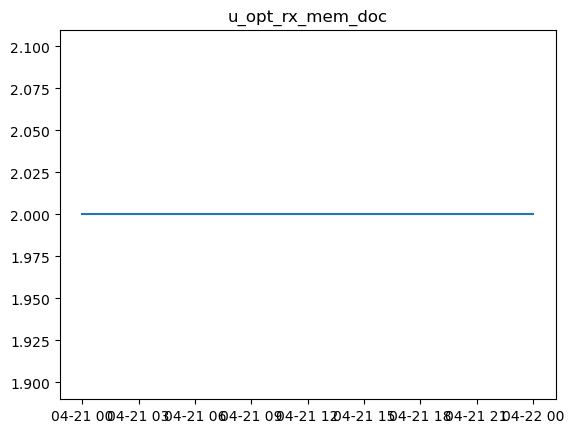

In [12]:
datagroup_name=datagroup_list[4]
specific_data=new_df[new_df['datagroup']==datagroup_name]
plt.title(datagroup_name)
plt.plot(specific_data.timestamp,specific_data.files_count)

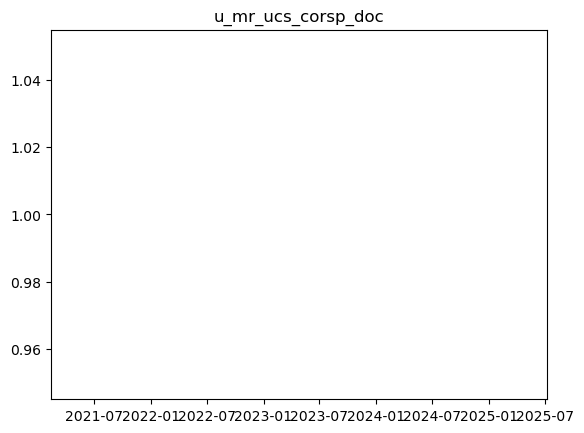

In [13]:
datagroup_name=datagroup_list[5]
specific_data=new_df[new_df['datagroup']==datagroup_name]
plt.title(datagroup_name)
plt.plot(specific_data.timestamp,specific_data.files_count)

In [14]:
# forecasting models

In [15]:
datagroup_name=datagroup_list[0]
print("forcasting for datagroup",datagroup_name)
specific_data=new_df[new_df['datagroup']==datagroup_name]

forcasting for datagroup u_clinical_docs


In [16]:
specific_data.files_count.values

array([2, 0, 2, 1, 0, 1], dtype=int64)

In [17]:
# univariate multi-step vector-output stacked lstm example
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

# split a univariate sequence into samples
def split_sequence(sequence, n_steps_in, n_steps_out):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps_in
		out_end_ix = end_ix + n_steps_out
		# check if we are beyond the sequence
		if out_end_ix > len(sequence):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

# define input sequence
raw_seq = list(specific_data.files_count.values)
# choose a number of time steps
n_steps_in, n_steps_out = 4, 2
# split into samples
X, y = split_sequence(raw_seq, n_steps_in, n_steps_out)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(n_steps_in, n_features)))
model.add(LSTM(100, activation='relu'))
model.add(Dense(n_steps_out))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=50, verbose=2)


Epoch 1/50
1/1 - 4s - loss: 0.5174 - 4s/epoch - 4s/step
Epoch 2/50
1/1 - 0s - loss: 0.4994 - 11ms/epoch - 11ms/step
Epoch 3/50
1/1 - 0s - loss: 0.4836 - 7ms/epoch - 7ms/step
Epoch 4/50
1/1 - 0s - loss: 0.4688 - 11ms/epoch - 11ms/step
Epoch 5/50
1/1 - 0s - loss: 0.4550 - 9ms/epoch - 9ms/step
Epoch 6/50
1/1 - 0s - loss: 0.4424 - 11ms/epoch - 11ms/step
Epoch 7/50
1/1 - 0s - loss: 0.4298 - 9ms/epoch - 9ms/step
Epoch 8/50
1/1 - 0s - loss: 0.4174 - 13ms/epoch - 13ms/step
Epoch 9/50
1/1 - 0s - loss: 0.4054 - 6ms/epoch - 6ms/step
Epoch 10/50
1/1 - 0s - loss: 0.3930 - 11ms/epoch - 11ms/step
Epoch 11/50
1/1 - 0s - loss: 0.3802 - 11ms/epoch - 11ms/step
Epoch 12/50
1/1 - 0s - loss: 0.3669 - 10ms/epoch - 10ms/step
Epoch 13/50
1/1 - 0s - loss: 0.3530 - 12ms/epoch - 12ms/step
Epoch 14/50
1/1 - 0s - loss: 0.3385 - 10ms/epoch - 10ms/step
Epoch 15/50
1/1 - 0s - loss: 0.3229 - 12ms/epoch - 12ms/step
Epoch 16/50
1/1 - 0s - loss: 0.3063 - 11ms/epoch - 11ms/step
Epoch 17/50
1/1 - 0s - loss: 0.2885 - 15ms/ep

In [25]:
# demonstrate prediction
x_input = array(raw_seq[:-n_steps_out][-n_steps_in:])
x_input = x_input.reshape((1, n_steps_in, n_features))
yhat = model.predict(x_input, verbose=0)
print("next two values prediction",yhat)
for y in yhat[0]:
    print(round(y),end="  ")

next two values prediction [[0.00127215 0.89713573]]
0  1  